# INFO 2950 Phase 2

## Research Question
What factors affect the Instagram trends and statistics of four-year colleges and universities in the U.S.?

## Data Collection and Cleaning
TODO remove this  
Document every step that takes your raw data file(s) and turns it into the analysis-ready data set that you would submit with your final project.  
Include text cells describing your data collection (downloading, scraping, surveys, etc), and text cells describing any additional data curation/cleaning (merging data frames, filtering, transformations of variables, etc).  
Include code cells for data curation/cleaning, but not collection.  
END

More detailed information on our data cleaning can be found in our [data cleaning notebook](phase2-data.ipynb).  

### Instagram Data

TODO how Changyuan collected the data

Eg. first 3 lines of `cornelluniversity.out`:
```
2019-09-08 15:42:32.026749,190.5k,160,1773
2019-09-09 12:00:03.187746,190.7k,160,1774
2019-09-10 12:00:02.818769,190.9k,160,1775
```

1. Read `.out` files and convert them to dataframes
0. Add column header: `columns = ["date", "followers", "following", "posts"]`
0. Convert first column to datetime
0. Apply function that replaces `k` and `m` to clean up numeric columns
0. Write cleaned dataframes to `.csv` files

Eg. first 4 lines of `cornelluniversity.csv`:
```
date,followers,following,posts
2019-09-08 15:42:32.026749,190500,160,1773
2019-09-09 12:00:03.187746,190700,160,1774
2019-09-10 12:00:02.818769,190900,160,1775
```

### Scorecard Data

TODO how Changyuan collected the data

Eg. first 23 lines of `scorecard_raw.json`:
```
[
  {
    "id": 147244,
    "latest.admissions.admission_rate.overall": 0.6126,
    "latest.admissions.sat_scores.average.overall": 1125.0,
    "latest.cost.attendance.academic_year": 46026,
    "latest.cost.avg_net_price.private": 20560,
    "latest.cost.avg_net_price.public": null,
    "latest.student.demographics.avg_family_income": 66334,
    "latest.student.demographics.median_family_income": 49741,
    "latest.student.size": 1918,
    "location.lat": 39.842612,
    "location.lon": -88.976298,
    "school.carnegie_size_setting": 11,
    "school.carnegie_undergrad": 13,
    "school.city": "Decatur",
    "school.locale": 13,
    "school.name": "Millikin University",
    "school.ownership": 2,
    "school.region_id": 3,
    "school.state": "IL",
    "school.zip": "62522-2084"
  },
```

1. Load `.json` file and convert it to dataframe
2. Rename columns
3. Rename entries from integers to human-readable values for ownership, region, and locale
4. Drop more columns for readability (we may choose to include them later)
5. Write cleaned dataframe to `.csv` file

Eg. first 2 lines of `scorecard.csv`:
```
admission_rate,sat_score,cost_attendance,income_avg,income_med,size,lat,lon,city,name,ownership,region,state,locale_type,locale_size
0.6126,1125.0,46026.0,66334.0,49741.0,1918.0,39.842612,-88.976298,Decatur,Millikin University,private non-profit,great lakes,IL,city,small
```

### Merged Data

We merged the data with a left join between a new Instagram summary statistics dataframe and the scorecard dataframe.

1. Generate summary statistics for the Instagram dataset and create a dataframe from it
0. Using a mapping from Instagram handles to college/university name, add a column "name" to the Instagram dataframe
0. Merge the dataframes with a left join on the "name" column
0. Write the result to a `.csv` file

Eg. first 2 lines of `instagram-details.csv`:
```
instagram,follower_curr,follower_mean,follower_med,follower_std,follower_min,follower_max,following_curr,following_mean,following_med,following_std,following_min,following_max,posts_curr,posts_mean,posts_med,posts_std,posts_min,posts_max,name,id,admission_rate,sat_score,cost_attendance,net_price_private,net_price_public,income_avg,income_med,size,lat,lon,carnegie_size_setting,carnegie_undergrad,city,locale,ownership,region,state,zip,locale_type,locale_size

amherstcollege,17700.0,15826.912928759895,15600.0,934.7289567341286,14200.0,17700.0,650.0,636.0343007915567,636.0,12.17145525352865,617.0,655.0,2043.0,1964.8416886543537,1960.0,46.55475530582614,1886.0,2043.0,Amherst College,164465.0,0.12810000000000002,1449.0,71300.0,25208.0,,78988.0,42053.0,1855.0,42.372459,-72.518493,11.0,14.0,Amherst,21.0,private non-profit,new england,MA,01002-5000,suburb,large
```

## Data Description
TODO remove this
- What are the observations (rows) and the attributes (columns)?
- Why was this dataset created?
- Who funded the creation of the dataset?
- What processes might have influenced what data was observed and recorded and what was not?
- What preprocessing was done, and how did the data come to be in the form that you are using?
- If people are involved, were they aware of the data collection and if so, what purpose did they expect the data to be used for?
- Where can your raw source data be found, if applicable? Provide a link to the raw data (hosted in a Cornell Google Drive or Cornell Box).

TODO write this

## Data Limitations

### Instagram Data
1. We have chunks of missing or corrupt data. We think this is due to Instagram's rate limiting, and mishandling of rate-limiting errors when collecting this data. This can be observed in the data exploration graphs. We attempted to fix some of this (particularly range and rate of change) by recently scraping more data and ensuring that the beginning and ending dates had fully populated entries.
2. The Instagram handles are handpicked by Changyuan, and is thus not comprehensive. It is not necessarily representative of all types of colleges/universities in the U.S. For example, there tends to be more Colorado schools (where Changyuan is from).
3. Instagram statistics are not as granular as we would've liked (eg. `k` to denote thousand and `m` to denote million). As a result, there is some stepping that can be observed in the graphs (especially for Harvard and other Instagram accounts with high follower counts).
3. Our dataset is 3-dimensional: Instagram handle, statistics, time. As a result, there is some information loss when collapsing it to 2D. In this phase, we chose to collapse statistics and time into one variable: summary statistics over time. This can be observed in the exploratory data analysis for our merged dataset.

### Scorecard Data
1. This dataset is massive, so it had to be heavily filtered. Many columns that we deemed irrelevant were dropped. We also filtered the dataset down to four-year colleges. This limitation caused us to change our research question to be more specific.
2. TODO data source?

## Exploratory Data Analysis

More detailed information (and more exploratory data analysis) can be found in our [data exploration notebook](phase2-exploration.ipynb).

In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt

In [44]:
data_dir = "../data"

### Instagram Data

In [46]:
instagram_dir = os.path.join(data_dir, "instagram")
instagram_files = os.listdir(instagram_dir)

instagram_df = {}
for file in instagram_files:
    df = pd.read_csv(os.path.join(instagram_dir, file))
    df.date = pd.to_datetime(df.date)
    instagram_df[file.split(".")[0]] = df

This code is adapted from the data exploration notebook. It creates a follower means dataframe and sorts by follower means, then defines some functions to plot the follower counts. The Instagram accounts were grouped by follower means to more easily display a localized view of the data and compare it to its neighbors. The downside is that the y-axis is inconsistent, which means that slopes should not be compared between different plots.

In [5]:
college_names = []
follower_means = []

for (name, df) in instagram_df.items():
    followers = df.followers
    
    follower_mean = followers.mean()
    
    college_names.append(name)
    follower_means.append(follower_mean)

follower_means_df = pd.DataFrame(data={"name": college_names, "follower_means": follower_means})
follower_means_df = follower_means_df.sort_values(by=["follower_means"]).reset_index(drop=True)
follower_means_df.head()

def follower_counts(n, offset):
    return follower_means_df.loc[offset:offset+n-1]

def plot_follower_counts(names):
    for name in names:
        df = instagram_df[name]
        date = df.date
        followers = df.followers
        plt.plot(date, followers, label=name)
    plt.legend()
    plt.show()

Some interesting plots we found:

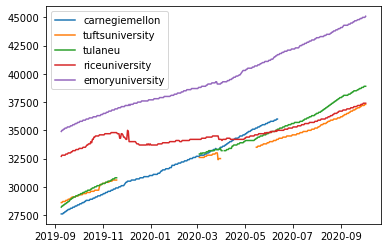

In [19]:
# riceuniversity is not doing so well on Instagram
plot_follower_counts(follower_counts(5,25).name)

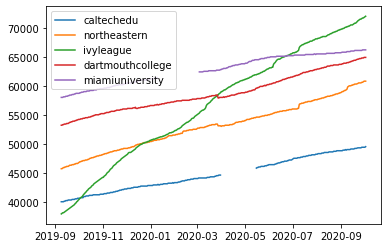

In [24]:
# ivyleague is growing consistently faster than its neighbors (but is not associated with any single institution)
plot_follower_counts(follower_counts(5,31).name)

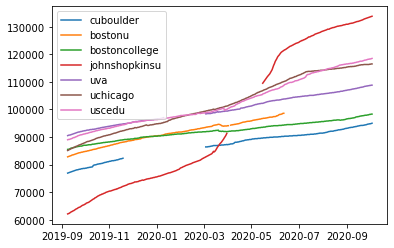

In [12]:
# johnshopkinsu shot up in Instagram followers around March-June
plot_follower_counts(follower_counts(7,42).name)

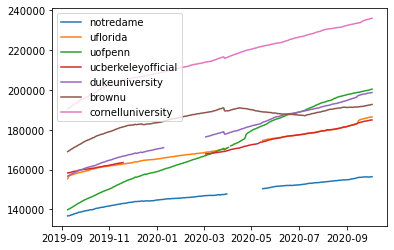

In [31]:
# brownu had a steady period of losing followers between April and July
plot_follower_counts(follower_counts(7,54).name)

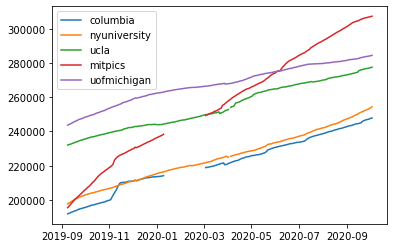

In [41]:
# mitpics is doing something right
plot_follower_counts(follower_counts(5,61).name)

We also noticed something interesting: across many of the colleges/universities, there seems to be a tiny dip in follower count at around the end of March / beginning of April. We hypothesize that this is because of acceptance results coming out, and that most of the unfollows are from seniors who didn't get accepted (or got accepted to better schools).

,name,percent_increase
0,johnshopkinsu,115.458937
1,ivyleague,89.973615
2,csupueblo,67.266592
3,mitpics,57.237852
4,claremontmckennacollege,47.784810


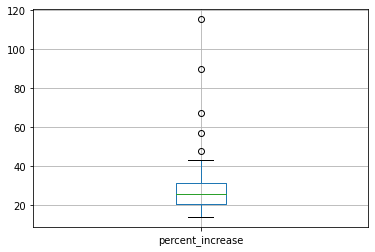

In [42]:
college_names = []
follower_percent_increases = []

for (name, df) in instagram_df.items():
    followers = df.followers
    
    follower_percent_increase = (followers.max() - followers.min()) / followers.min() * 100
    
    college_names.append(name)
    follower_percent_increases.append(follower_percent_increase)

follower_increase = pd.DataFrame(data={"name": college_names, "percent_increase": follower_percent_increases})
follower_increase = follower_increase.sort_values(by=["percent_increase"], ascending=False).reset_index(drop=True)
follower_increase.boxplot()
follower_increase.head()

It's also interesting that Johns Hopkins University had the most drastic follower percent increase, at over +100%.

### Scorecard Data

In [45]:
scorecard = pd.read_csv(os.path.join(data_dir, "scorecard.csv"))
scorecard.head()

,admission_rate,sat_score,cost_attendance,income_avg,income_med,size,lat,lon,city,name,ownership,region,state,locale_type,locale_size
0,0.6126,1125.0,46026.0,66334.0,49741.0,1918.0,39.842612,-88.976298,Decatur,Millikin University,private non-profit,great lakes,IL,city,small
1,0.6937,1114.0,47726.0,70047.0,59988.0,901.0,40.914824,-90.637310,Monmouth,Monmouth College,private non-profit,great lakes,IL,town,medium
2,0.7593,NaN,42221.0,67598.0,59194.0,971.0,39.731300,-90.246171,Jacksonville,Illinois College,private non-profit,great lakes,IL,town,medium
3,0.6815,1079.0,39884.0,64558.0,50859.0,916.0,39.938898,-91.385975,Quincy,Quincy University,private non-profit,great lakes,IL,town,small
4,0.6351,1113.0,25766.0,52255.0,46593.0,398.0,40.148924,-89.346721,Lincoln,Lincoln Christian University,private non-profit,great lakes,IL,town,medium


Our data is mostly from the U.S., as expected! We also looked at the relationships between some other variables, and found some cool (but mostly expected) results.

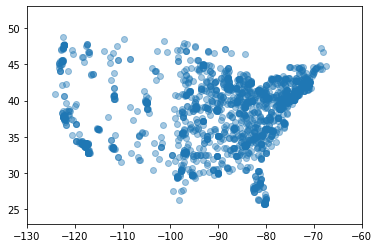

In [47]:
plt.scatter(scorecard.lon, scorecard.lat, alpha=0.4)
plt.xlim(-130, -60)
plt.ylim(23, 53)
plt.show()

Correlation between median income and SAT score: 0.56


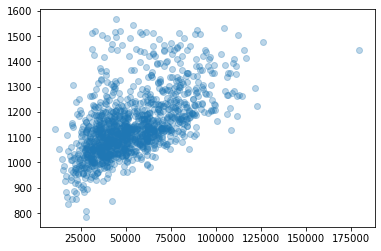

In [53]:
income_med = scorecard.income_med
sat_score = scorecard.sat_score
print("Correlation between median income and SAT score: {:.2f}".format(income_med.corr(sat_score)))
plt.scatter(income_med, sat_score, alpha=0.3)
plt.show()

The medium correlation between income and SAT score was one our more interesting results.

### Merged Data

In [54]:
instagram_details = pd.read_csv(os.path.join(data_dir, "instagram_details.csv"))
instagram_details.head()

,name,instagram,follower_curr,follower_mean,follower_med,follower_std,follower_min,follower_max,following_curr,following_mean,...,income_med,size,lat,lon,city,ownership,region,state,locale_type,locale_size
0,Amherst College,amherstcollege,17800.0,15857.662338,15600.0,959.139013,14200.0,17800.0,650.0,636.251948,...,42053.0,1855.0,42.372459,-72.518493,Amherst,private non-profit,new england,MA,suburb,large
1,Arizona State University-Tempe,arizonastateuniversity,118900.0,105752.835052,104450.0,7242.379383,94100.0,118900.0,1523.0,1545.634021,...,35851.0,42529.0,33.417721,-111.934383,Tempe,public,southwest,AZ,city,medium
2,Boston College,bostoncollege,98600.0,92220.822622,92100.0,3247.227738,85500.0,98600.0,301.0,267.388175,...,103007.0,9639.0,42.336213,-71.169242,Chestnut Hill,private non-profit,new england,MA,city,small
3,Boston University,bostonu,108200.0,91363.868613,91500.0,4608.620804,82800.0,108200.0,2775.0,2568.832117,...,81244.0,17238.0,42.351118,-71.107942,Boston,private non-profit,new england,MA,city,large
4,Bowdoin College,bowdoincollege,18500.0,16983.629893,17100.0,939.613708,15100.0,18500.0,1542.0,1512.483986,...,61622.0,1825.0,43.907134,-69.963942,Brunswick,private non-profit,new england,ME,town,large


We plotted the follower summary statistics with various variables. However, there were mostly low correlations.

Correlation between follower median and college size: 0.51


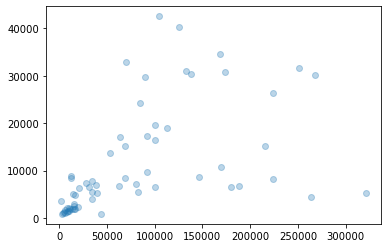

In [58]:
outliers = {"Harvard University", "Stanford University", "Yale University"}
filtered_instagram_details = instagram_details[~instagram_details.name.isin(outliers)]

follower_med = filtered_instagram_details.follower_med
college_size = filtered_instagram_details["size"]
print("Correlation between follower median and college size: {:.2f}".format(follower_med.corr(college_size)))
plt.scatter(follower_med, college_size, alpha=0.3)
plt.show()

The exception was when we removed a few outliers. Then, most of the plots increased in correlation. For example, there seems to be a medium correlation between follower count and college size.

## Questions for Reviewers

#### Everyone:
1. Is our research question clear/specific enough? Is there significant potential for interesting analyses?
2. Did we miss any potentially interesting routes to explore? What are some other questions you have that might be answered by our data?
3. Do you have any other suggestions for how to improve our project?

#### Project Mentor:
1. Where do we go after our initial exploratory data analysis?
2. What are some examples of preregistration of analyses? What are some example of final phase analyses?